In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

np.random.seed(14159)

In [2]:
# Set parameters
p, n, m = 150, 300, 60

In [3]:
# Define variables
setting = "$p = {{{}}} \\quad n = {{{}}} \\quad m = {{{}}}$".format(p, n, m)
y = np.random.choice([-1, 1], size=n)

In [4]:
# Clustering
mu_norm_exp = np.linspace(0, 5, 50)
h_norm_exp = np.array([0.5, 1.5])
acc_unfolding = np.zeros((len(mu_norm_exp), len(h_norm_exp)))
acc_tensor = np.zeros_like(acc_unfolding)

for i, mu_norm in enumerate(tqdm(mu_norm_exp)):
    for j, h_norm in enumerate(h_norm_exp):
        X = utils.model(p, n, m, mu_norm, h_norm, y) # generate X
        yu = utils.unfolding_clustering(X) # clustering with unfolding
        yt = utils.tensor_clustering(X) # clustering with rank 1 approximation
        acc_unfolding[i, j] = np.mean(np.sign(yu) == y)
        acc_tensor[i, j] = np.mean(np.sign(yt) == y)
acc_unfolding = np.maximum(acc_unfolding, 1-acc_unfolding)
acc_tensor = np.maximum(acc_tensor, 1-acc_tensor)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [01:41<00:00,  2.03s/it]


In [5]:
# Predicted accuracies
mu_norm_th = np.linspace(mu_norm_exp[0], mu_norm_exp[-1], 200)
acc_t = utils.tensor_accuracy(p, n, m, mu_norm_th, h_norm_exp)
acc_u = utils.unfolding_accuracy(p, n, m, mu_norm_th, h_norm_exp)
acc_wm = utils.weighted_mean_accuracy(p, n, m, mu_norm_th, h_norm_exp)

100%|██████████| 200/200 [00:09<00:00, 20.68it/s]


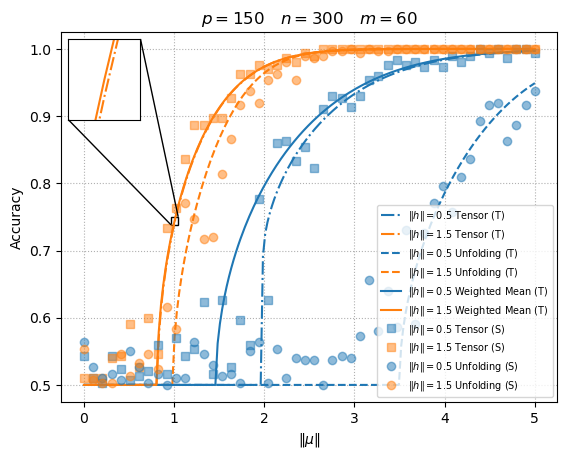

In [6]:
fig, ax1 = plt.subplots()
axins = zoomed_inset_axes(ax1, 10, loc='upper left')
dx, dy = .04, .006
y0 = .75
idx1 = np.argmax(h_norm_exp)
idx0 = np.argmin(np.abs(acc_wm[:, idx1]-.75))
x0, y0 = mu_norm_th[idx0], acc_wm[idx0, idx1]
axins.set_xlim(x0-dx, x0+dx)
axins.set_ylim(y0-dy, y0+dy)
axins.set_xticks([])
axins.set_yticks([])
mark_inset(ax1, axins, loc1=1, loc2=3)

for ax in [ax1, axins]:
    ax.plot(mu_norm_th, acc_t, ls='-.', label=["$\\Vert h \\Vert = {{{}}}$ Tensor (T)".format(h_norm) for h_norm in h_norm_exp])
    ax.set_prop_cycle(None)
    ax.plot(mu_norm_th, acc_u, ls='--', label=["$\\Vert h \\Vert = {{{}}}$ Unfolding (T)".format(h_norm) for h_norm in h_norm_exp])
    ax.set_prop_cycle(None)
    ax.plot(mu_norm_th, acc_wm, ls='-', label=["$\\Vert h \\Vert = {{{}}}$ Weighted Mean (T)".format(h_norm) for h_norm in h_norm_exp])
    ax.set_prop_cycle(None)
    ax.plot(mu_norm_exp, acc_tensor, ls='', marker='s', alpha=.5, label=["$\\Vert h \\Vert = {{{}}}$ Tensor (S)".format(h_norm) for h_norm in h_norm_exp])
    ax.set_prop_cycle(None)
    ax.plot(mu_norm_exp, acc_unfolding, ls='', marker='o', alpha=.5, label=["$\\Vert h \\Vert = {{{}}}$ Unfolding (S)".format(h_norm) for h_norm in h_norm_exp])
ax1.grid(ls=':')
ax1.set_xlabel("$\\Vert \\mu \\Vert$")
ax1.set_ylabel("Accuracy")
ax1.set_title(setting)
ax1.legend(fontsize=7)

plt.show()